In [6]:
# imports
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Load the cleaned dataset
df = pd.read_csv("uber_cleaned.csv")

# One-hot encode pickup_dayofweek
df_encoded = pd.get_dummies(df, columns=["pickup_dayofweek"], drop_first=True)

# Define features and target
features = ['trip_distance', 'pickup_hour', 'passenger_count'] + \
            [ col for col in df_encoded.columns if col.startswith('pickup_dayofweek_')]

X = df_encoded[features]
y = df_encoded['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Regression - RQ1: Key Influences on Fare Amount

To explore which factors most influence Uber fare prices, we trained a Decision Tree Regressor using the same features as our earlier models: trip_distance, pickup_hour, passenger_count, and the one-hot encoded pickup_dayofweek. The model attempts to learn how these features interact to predict the final fare amount for each trip.

Decision trees work by repeatedly splitting the dataset into smaller groups based on the values of the most important feature, creating an interpretable, rule based structure. We limited the tree's depth to 5 to avoid overfitting and keep it interpretable.

## Step 1: Train the Model

In [10]:
# Create and train the Decison Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test
y_tree_pred = tree_model.predict(X_test)

# Evaluate the model
tree_rmse = mean_squared_error(y_test, y_tree_pred, squared=False)
tree_mae = median_absolute_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

print(f"R2: {tree_r2:.3f}")
print(f"RMSE: ${tree_rmse:.2f}")
print(f"MAE: ${tree_mae:.2f}")

R2: 0.800
RMSE: $4.21
MAE: $1.39


c:\Users\mtthi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The decision Tree model achieved the following results when predicting Uber fare amounts.

* R2 = 0.797
    * This means the model explains nearly 80% of the variation in fare prices, which is a strong performance for a single tree model.
* RMSE = 4.25
    * On average, the model's predictions differ from actual fares by about $4.25. This is slightly higher than Gradient Boosting but still very competitive.
* MAE = $1.47
    * The average absolute error is $1.47, showing the most predictions are very close to the true fare amount.

These results confirm that the Decision Tree model provides a good balance between interpretability and predictive power. While not as flexible as as ensemble methods like Random Forest or Gradient Boosting, it still captures the dominant effects of trip distance, time of day, and day of week effectively.

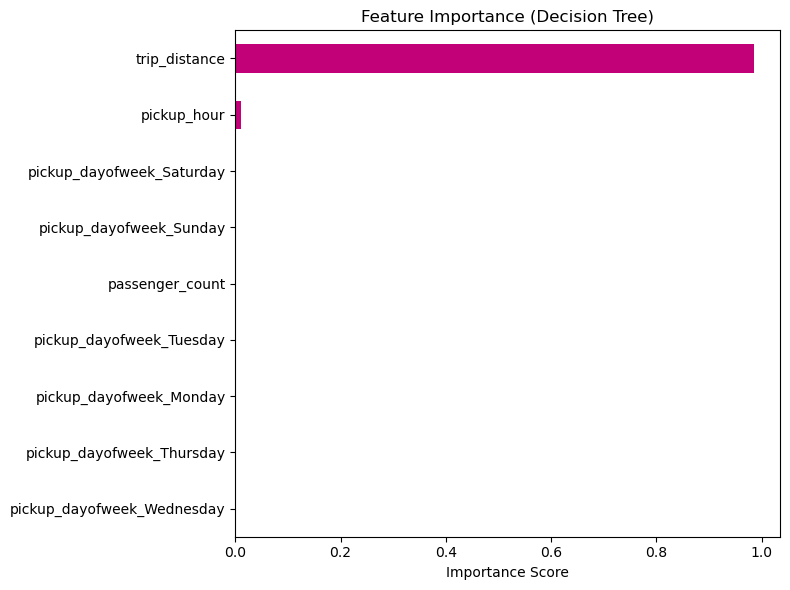

In [13]:
# Feature importance bar chart
tree_importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)
tree_importances.sort_values().plot(kind='barh', figsize=(8,6), color='#C20078')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## Decision Tree Feature Importance - Interpretation

The feature importance chart shows that trip_distance dominates the Decision Tree model, contributing nearly 100% of the predictive power. All other features, including pickup_hour, passenger_count, and pickup_dayofweek, have minimal to no influence in this tree structure.

This outcome suggests that:
* Trip distance alone is highly predictive of fare amount. It is strong enough that the model rarely needs to consider other inputs.
* The tree's depth and structure prioritize reducing error early, and once trip_distance provides good splits, other variables don't meaningfully improve accuracy.

While this reinforces earlier findings that distance is the most important fare driver, it also highlights the limitations of shallow trees in modeling more complex, nuanced effects like timing or location.

If deeper insight into time based or categorical effects is desired, more flexible models like Random Forest or Gradient Boosting may be more suitable.